In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import chi2,SelectKBest,SelectPercentile
from sklearn.metrics import accuracy_score

In [0]:
data=sns.load_dataset('titanic')

In [4]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [0]:
data=data.drop(['age','deck'], axis=1)

In [8]:
data.isnull().sum()

survived       0
pclass         0
sex            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [0]:
data=data.dropna(axis=1)

In [10]:
data.isnull().sum()

survived      0
pclass        0
sex           0
sibsp         0
parch         0
fare          0
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64

In [0]:
data2=data[['pclass', 'sex', 'sibsp', 'parch',  'who', 'alone']].copy()

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
encoder= LabelEncoder()

In [25]:
data2.head()

,pclass,sex,sibsp,parch,who,alone
0,3,male,1,0,man,False
1,1,female,1,0,woman,False
2,3,female,0,0,woman,True
3,1,female,1,0,woman,False
4,3,male,0,0,man,True


In [0]:
data2['sex']=encoder.fit_transform(data2['sex'])

In [28]:
data2.head()

,pclass,sex,sibsp,parch,who,alone
0,3,1,1,0,man,False
1,1,0,1,0,woman,False
2,3,0,0,0,woman,True
3,1,0,1,0,woman,False
4,3,1,0,0,man,True


In [0]:
data2['alone']=encoder.fit_transform(data2['alone'])

In [0]:
data2['who']=encoder.fit_transform(data2['who'])

In [31]:
data2.head()

,pclass,sex,sibsp,parch,who,alone
0,3,1,1,0,1,0
1,1,0,1,0,2,0
2,3,0,0,0,2,1
3,1,0,1,0,2,0
4,3,1,0,0,1,1


In [0]:
x=data2.copy()
y=data['survived']

In [33]:
x.shape, y.shape

((891, 6), (891,))

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [0]:
f_score=chi2(X_train,y_train)

In [0]:
p_value= pd.Series(f_score[1], index=X_train.columns)
p_value.sort_values(ascending=True, inplace=True)

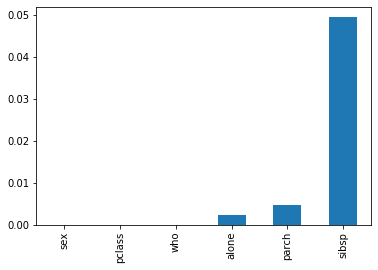

In [38]:
p_value.plot.bar()

In [0]:
X_train_2 = X_train[['who', 'sex']]
X_test_2 = X_test[['who', 'sex']]


In [0]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy: ', accuracy_score(y_test, y_pred))

In [41]:
run_randomForest(X_train_2,X_test_2, y_train, y_test)

Accuracy:  0.776536312849162


In [0]:
X_train_3 = X_train[['who', 'sex', 'pclass']]
X_test_3 = X_test[['who', 'sex', 'pclass']]


In [43]:
run_randomForest(X_train_3, X_test_3,y_train,y_test)

Accuracy:  0.7932960893854749
